In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [3]:
train = pd.read_csv("Train.csv")
train.head()

,engine_capacity_cc,fuel_category,owner_count,car_brand,transmission_type,exterior_color,fuel_efficiency_kmpl
0,5000,Petrol,2,Nissan,Automatic,Black,15.985031
1,1200,Diesel,3,Chevrolet,Manual,Gray,21.093824
2,5000,Diesel,4,Toyota,Automatic,Blue,9.789724
3,1000,Diesel,3,Chevrolet,Manual,Red,25.626237
4,1000,Diesel,1,BMW,Manual,Gray,22.844176


In [6]:
train.shape

(14800, 7)

In [8]:
train.isnull().sum()

engine_capacity_cc      0
fuel_category           0
owner_count             0
car_brand               0
transmission_type       0
exterior_color          0
fuel_efficiency_kmpl    0
dtype: int64

In [10]:
train.duplicated().sum()

0

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14800 entries, 0 to 14799
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   engine_capacity_cc    14800 non-null  int64  
 1   fuel_category         14800 non-null  object 
 2   owner_count           14800 non-null  int64  
 3   car_brand             14800 non-null  object 
 4   transmission_type     14800 non-null  object 
 5   exterior_color        14800 non-null  object 
 6   fuel_efficiency_kmpl  14800 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 809.5+ KB


In [14]:
test = pd.read_csv("Test.csv")
test.head()

,engine_capacity_cc,fuel_category,owner_count,car_brand,transmission_type,exterior_color,fuel_efficiency_kmpl
0,1500,Electric,3,Kia,Automatic,Black,NaN
1,1000,Diesel,3,Ford,Automatic,Silver,NaN
2,800,Petrol,5,Nissan,Automatic,Black,NaN
3,1500,Electric,5,Tesla,Manual,Blue,NaN
4,3000,Petrol,3,Ford,Manual,Silver,NaN


In [16]:
test.shape

(200, 7)

In [18]:
test.isnull().sum()

engine_capacity_cc        0
fuel_category             0
owner_count               0
car_brand                 0
transmission_type         0
exterior_color            0
fuel_efficiency_kmpl    200
dtype: int64

In [20]:
test.duplicated().sum()

0

<Axes: ylabel='fuel_efficiency_kmpl'>

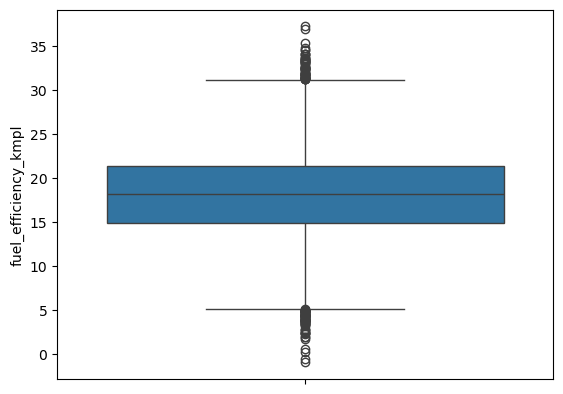

In [22]:
sns.boxplot(train['fuel_efficiency_kmpl'])

In [24]:
combined = pd.concat([train, test], axis = 0)
combined.shape

(15000, 7)

In [26]:
numerical_columns = combined.select_dtypes(exclude= 'object')

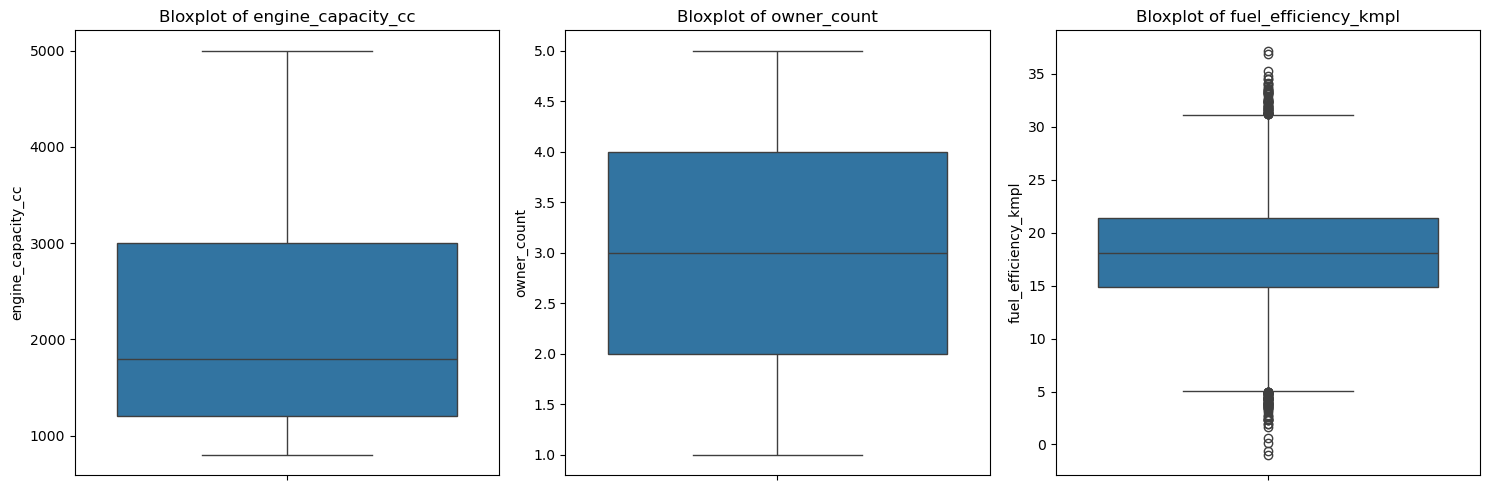

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes = axes.flatten()

for i, col in enumerate(numerical_columns.columns):
    sns.boxplot(data = combined, y=col, ax=axes[i])
    axes[i].set_title(f'Bloxplot of {col}')

plt.tight_layout()
plt.show()

In [42]:
categorical_variables = combined.select_dtypes(include= 'object')

In [40]:
combined['car_brand'].value_counts()

car_brand
Ford          1539
Chevrolet     1528
Kia           1517
Honda         1517
Toyota        1513
Nissan        1512
Volkswagen    1500
Tesla         1480
BMW           1450
Hyundai       1444
Name: count, dtype: int64

In [36]:
combined['transmission_type'].value_counts()

transmission_type
Automatic    7503
Manual       7497
Name: count, dtype: int64

In [38]:
combined['exterior_color'].value_counts()

exterior_color
White     2546
Gray      2524
Blue      2506
Black     2494
Silver    2472
Red       2458
Name: count, dtype: int64

In [46]:
le = LabelEncoder()
for i in categorical_variables:
    combined[i] = le.fit_transform(combined[i])

In [48]:
combined.head()

,engine_capacity_cc,fuel_category,owner_count,car_brand,transmission_type,exterior_color,fuel_efficiency_kmpl
0,5000,2,2,6,0,0,15.985031
1,1200,0,3,1,1,2,21.093824
2,5000,0,4,8,0,1,9.789724
3,1000,0,3,1,1,3,25.626237
4,1000,0,1,0,1,2,22.844176


In [50]:
newtrain = combined.iloc[0:14800, :]
newtest = combined.iloc[14800: , :]

In [52]:
newtrain.shape

(14800, 7)

In [54]:
newtest = newtest.drop('fuel_efficiency_kmpl', axis = 1)
newtest.shape

(200, 6)

In [56]:
x = newtrain.drop('fuel_efficiency_kmpl', axis = 1)
y = newtrain['fuel_efficiency_kmpl']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [76]:
models = {'Linear Regression': LinearRegression(), 'Random Forest': RandomForestRegressor(),
         'Bagging': BaggingRegressor(), 'Extra Tree': ExtraTreesRegressor(), 'LightGBM': LGBMRegressor(),
         'Gradient Boosting': GradientBoostingRegressor(), 'Adaboost': AdaBoostRegressor(),
         'XGB': XGBRegressor()}

In [78]:
def evaluate_models(x_train, x_test, y_train, y_test, models):
    results = {}
    for name, model in models.items():
        predictions = model.fit(x_train, y_train).predict(x_test)
        accuracy = np.sqrt(mean_squared_error(y_test, predictions))
        results[name] = accuracy
    return results

In [80]:
results = evaluate_models(x_train, x_test, y_train, y_test, models)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 38
[LightGBM] [Info] Number of data points in the train set: 11840, number of used features: 6
[LightGBM] [Info] Start training from score 18.149047


In [81]:
best_model_name = min(results, key = results.get)
best_model = models[best_model_name]

In [82]:
print(f"best model is {best_model_name} with rmse {results[best_model_name]}")

best model is Linear Regression with rmse 4.903400593403623


In [83]:
y_pred = best_model.fit(x_train, y_train).predict(x_test)

In [84]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

4.903400593403623


In [92]:
x_train = newtrain.drop('fuel_efficiency_kmpl', axis = 1)
y_train = newtrain['fuel_efficiency_kmpl']
x_test = newtest
y_pred = best_model.fit(x_train, y_train).predict(x_test)

In [94]:
solution = pd.DataFrame({'fuel_efficiency_kmpl': y_pred})
solution.head()

,fuel_efficiency_kmpl
0,18.107546
1,18.112022
2,18.018153
3,18.054572
4,18.083985


In [96]:
solution.to_csv('Solution.csv', index = False)

In [106]:
xgb = XGBRegressor()
x_train = newtrain.drop(['fuel_efficiency_kmpl', 'exterior_color'], axis = 1)
y_train = newtrain['fuel_efficiency_kmpl']
x_test = newtest.drop('exterior_color', axis = 1)
y_pred = xgb.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'fuel_efficiency_kmpl': y_pred})
solution.to_csv('XGB.csv', index = False)
## 5.94

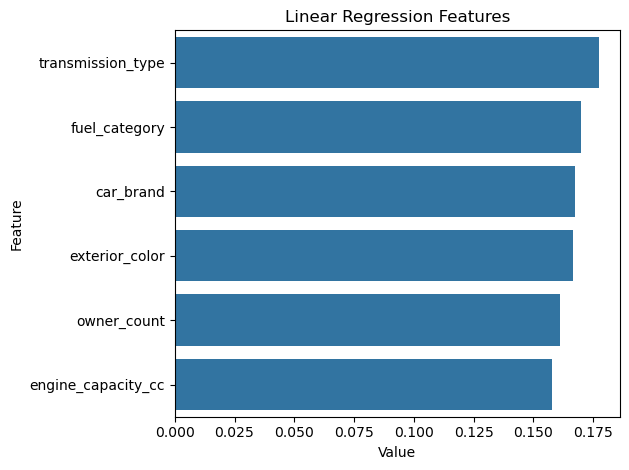

In [113]:
x = newtrain.drop('fuel_efficiency_kmpl', axis = 1)
y = newtrain['fuel_efficiency_kmpl']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
y_pred = xgb.fit(x_train, y_train).predict(x_test)
feature_imp = pd.DataFrame(sorted(zip(xgb.feature_importances_, x.columns), reverse=True)[:20], columns=['Value','Feature'])
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title(f'{best_model_name} Features')
plt.tight_layout()
plt.show()

In [125]:
xgb = XGBRegressor()
x_train = newtrain.drop(['fuel_efficiency_kmpl', 'exterior_color'], axis = 1)
y_train = newtrain['fuel_efficiency_kmpl']
pipeline = Pipeline([
    ('regressor', xgb)
])
param_distributions = {
    'regressor__n_estimators': randint(100, 1000),
    'regressor__learning_rate': uniform(0.01, 0.3),
    'regressor__max_depth': randint(3, 10),
    'regressor__subsample': uniform(0.6, 0.4),
    'regressor__colsample_bytree': uniform(0.6, 0.4),
    'regressor__gamma': uniform(0, 5),
    'regressor__min_child_weight': randint(1, 10)
}
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=50,  # number of iterations (try increasing to 100+ for better results)
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=1,
    random_state=42,
    n_jobs=-1
)
search.fit(x_train, y_train)
print(search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\ahpat\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


{'regressor__colsample_bytree': 0.749816047538945, 'regressor__gamma': 4.75357153204958, 'regressor__learning_rate': 0.22959818254342154, 'regressor__max_depth': 7, 'regressor__min_child_weight': 5, 'regressor__n_estimators': 714, 'regressor__subsample': 0.7783331011414365}


In [127]:
search.best_params_

{'regressor__colsample_bytree': 0.749816047538945,
 'regressor__gamma': 4.75357153204958,
 'regressor__learning_rate': 0.22959818254342154,
 'regressor__max_depth': 7,
 'regressor__min_child_weight': 5,
 'regressor__n_estimators': 714,
 'regressor__subsample': 0.7783331011414365}

In [129]:
xgb = XGBRegressor(regressor__colsample_bytree = 0.749816047538945, regressor__gamma = 4.75357153204958, regressor__learning_rate = 0.22959818254342154,
                  regressor__max_depth = 7, regressor__min_child_weight = 5, regressor__n_estimators = 714,
                  regressor__subsample = 0.7783331011414365)
x_train = newtrain.drop(['fuel_efficiency_kmpl', 'exterior_color'], axis = 1)
y_train = newtrain['fuel_efficiency_kmpl']
x_test = newtest.drop('exterior_color', axis = 1)
y_pred = xgb.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'fuel_efficiency_kmpl': y_pred})
solution.to_csv('Solution.csv', index = False)

C:\Users\ahpat\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:35:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "regressor__colsample_bytree", "regressor__gamma", "regressor__learning_rate", "regressor__max_depth", "regressor__min_child_weight", "regressor__n_estimators", "regressor__subsample" } are not used.

  warnings.warn(smsg, UserWarning)
